---
layout: post
title:  "Softmax Regression"
date:   2023-03-06 6:14:54 +0700
categories: jekyll update
---

# TOC

- [Definition](#define)
- [Cross entropy](#cross)
- [Another form](#form)
- [Code example](#code)



# Definition <a name="define"></a>
Remind us a bit about linear regression:

$$ \hat{y}=h_{\theta}(x) = \theta \cdot x $$

Where $$ h_{\theta} $$ is the hypothesis function with parameter vector $$ \theta $$ . $$ h_{\theta} $$ would turn input x into output y. Now remember when we wrap that linear combination using the logistic function to have a new $$ h_{\theta} $$. Also when we use the sign function in the perceptron. 

As you might have guessed, to have this new softmax function we are going to wrap the original linear combination inside a new and nonlinear function. One of the effect that we would like to have, i.e. that we didn’t have when we used the logistic regression and the perceptron, is that we would be able to use the new h to classify objects into more than two classes. In order to achieve this, we use this function called softmax (which is also called multinomial logistic):

$$ p_{i} = p(y=i \mid x; \theta) = \frac{e^{z_{i}}}{\sum_{j=1}^{K}e^{z_{j}}} \quad  with \quad z = \theta^{\top}x $$

This regression still make sure that the prediction maps to the highest value of y, only that it gives probability (a soft-max classification) instead of a hard classification. Also, when z < 0, the transformation will still transform those negative values and would be able to output sensible positive predictions.

# Cross entropy <a name="loss"></a>

In linear regression, when outputs are values that can be arbitrary, the distance between prediction and true value makes sense. With the softmax function, on the other hand, we output probability (which is between 0 and 1). To measure loss, i.e. the difference between the distribution of the prediction and the ground truth one, we use cross entropy. Here is the cross entropy between two distributions p and q:

$$ H(p,q) = - \sum_{i=1}^{y} p_{i} log q_{i} $$

Loss function for one single data point is:

$$ Loss(\theta, x_{i}, y_{i}) = - \sum_{j=1}^{K} y_{ji} log (h_{ji}(x)) $$

The total loss function is simply the total of all those loss functions in the dataset, with $$ h_{ji}(x) =  \frac{exp(\theta_{j}^{\top}x_i)}{\sum_{k=1}^{K}exp(\theta_{k}^{\top}x_{i})} $$ by definition:

$$ Loss = - \sum_{i=1}^{N} \sum_{j=1}^{K} y_{ji} log ( \frac{exp(\theta_{j}^{\top}x_i)}{\sum_{k=1}^{K}exp(\theta_{k}^{\top}x_{i})} ) $$

The update rule is:

$$ \theta \leftarrow \theta + \alpha x_{i} (y_{i} - h_{\theta}(x)) $$

You can see that, in the update rule, there is the distance between the real y and the transformed linear combination through softmax. This is in line with our loss function and update rule so far: at every step of the way we look at the different of what we predict compare to what turns out to be true. This also highlights the difference of machine learning: to do well on unforeseen data.

# Another form <a name="another"></a>

You can also see the following form to be the cost function. For one data point:

$$ Loss(\theta, x_{i}, y_{i}) = - \sum_{j=1}^{k}(1\{y^{i}=k\}.log \frac{exp(\theta_{k}^{\top}x_i)}{\sum_{j=1}^{k}exp(\theta_{j}^{\top}x_{i})}) $$

The indicator function 1{..} means that 1{true statement} = 1 and 1{false statement} = 0. The total cross entropy is the sum of all smaller cross entropies in the dataset:

$$ Loss = -\sum_{i=1}^{m} \sum_{j=1}^{k} (1\{y^{i}=k\} log \frac{exp(\theta_{x_{i}}^{\top}x_i)}{\sum_{k=1}^{K}exp(\theta_{k}^{\top}x_{i})} ) $$

Taking derivaties, the gradient is:

$$ \nabla_{\theta} L(\theta) = - \sum_{i=1}^{m} [ x^{i} (1\{y^{i} = k\} - p(y^{(i)} = k \mid x^{i}; \theta)) ] $$

with $$ p(y^{(i)} = k \mid x^{i}; \theta) = \frac{exp(\theta_{j}^{\top}x_i)}{\sum_{k=1}^{K}exp(\theta_{k}^{\top}x_{i})} $$

The update rule will be:

$$ \theta_{k} \leftarrow \theta_{k} + \alpha \frac{1}{m} \sum_{i=1}^{m} x^{i} (1 \{y = k\} - \frac{exp(\theta^{\top}_{k} x^{i})}{\sum_{j=1}^{k}exp(\theta_{j}^{\top} x^{i})}) $$

The nice thing about this update rule is that when it meets a correct prediction (1{y=k} = 1), it takes into account the error margin of that prediction by letting 1 multiply with (1 - p). When it meets an incorrect prediction (1{y=k} = 0), it takes into account all the error margins (p, since p should be 0 in incorrect prediction cases). In some sense, we can say that this algorithm looks at the mistake and make accordingly adjustment. In other words, it learns from its own mistake. 

And, remember that softmax function is a generalization of logistic function.

# Code example <a name="code"></a>

The following example uses the iris dataset (you can try also the MNIST dataset with this same recipe, accuracy around 80%). First we load the data and split it. For this data, we all have the length of the flower's part in cm and there is no missing value or outliers, hence we can jump right to the model training part. Remember that sklearn uses the same regressor (LogisticRegression) for softmax regression but you have to set multi_class='multinomial' yourself. After prediction, we plot the prediction and the ground truth together, there is only one misclassified point (yellow in class 1) and the accuracy is more than 96%. Congrats!

In [2]:
!pip install keras 

In [1]:
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_iris

In [2]:
iris = load_iris()
X = iris['data']
y = iris['target']
X_train, X_test, Y_train, Y_test = train_test_split(X, y, test_size=0.2, random_state=2)

In [3]:
softReg = LogisticRegression(multi_class = 'multinomial', solver = 'lbfgs',max_iter=1000)
softReg.fit(X_train,Y_train)

LogisticRegression(max_iter=1000, multi_class='multinomial')

In [4]:
Y_pred=softReg.predict(X_test)

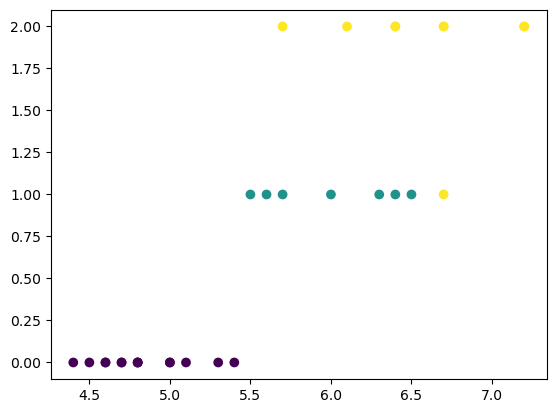

In [5]:
plt.scatter(X_test[:,0], Y_test, c=Y_pred)

![6SoftmaxReg_6_1](https://user-images.githubusercontent.com/7457301/223476900-5d9adc31-f6a5-42d4-8ddf-2b0054581b95.png)
